<a href="https://colab.research.google.com/github/ohhongseok/ML-DeepLearning/blob/main/8/8-1/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EA%B5%AC%EC%84%B1%EC%9A%94%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이번장 키워드
 - 합성곱
 - 필터
 - 특성맵
 - 패딩
 - 스트라이크
 - 풀링

# 합성곱 신경망을 들어가기 전 필수적인 개념 정리

# 합성곱 (CNN)
 - 이전 밀집층의 경우 10개의 입력이 들어가면 총 10개의 출력이 나온은 구조였음
  > 입력개수만큼의 가중치가 있어 모든 입력에 가중치를 곱하는 과정<br>
  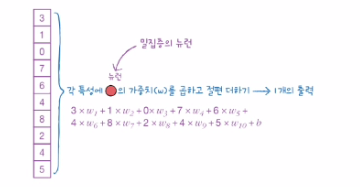
 - 합성곱의 경우 전체의 가중치를 적용하는것이 아닌 일부의 가중치를 곱하는 과정으로 진행됨
  > 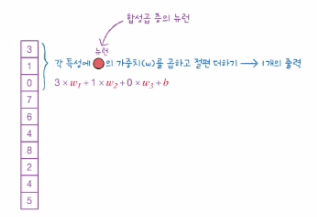<br>
   1. 이러한 가중치의 곱은 한칸씩 아래로 이동하며 중복된 결과로 합성곱이 표현됨<br>
   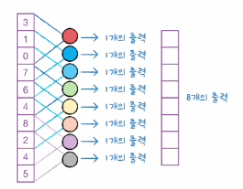<br>
   2. 따라서 밀집층의 경우 클래스의 개수만큼의 가중치를 가지고, 1개의 출력을 만드는 반면, <br>합성곱의 경우 n개의 가중치를 가지고, 가중치 x개를 만들어낸다.<br>
   3. 합성곱의 가중치의 경우 하이퍼파라미터로 우리가 직접 결정하는 인자이다.
 - 합성곱 신경망에서는 뉴런은 ***필터 / 커널*** 이라 한다.
  >합성곱에서의 필터와 커널<br>
  필터 : 뉴런의 개수<br>
  커널 : 곱해지는 가중치
 - 합성곱의 장점은 2차원에서도 사용이 가능하다.
  > 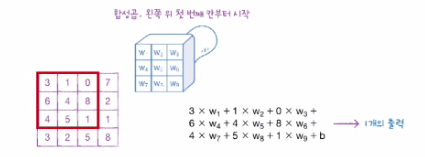 <br>
 - 그림과 같이 커널의 크기(하이퍼파라미터)를 지정 후(3*3) 한칸씩 이동을 해가며 커널과 입력을 곱한다.
  > 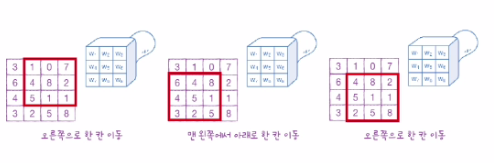
 - 위와같이 입력과 커널을 곱하여 얻은 출력을 ***특성맵*** 이라고 한다.  
 - 합성곱은 하나의 층만이 아닌 여러개의 필터(예시. B, G, R)를 사용하여 3차원으로도 나타낼 수 있음
  >  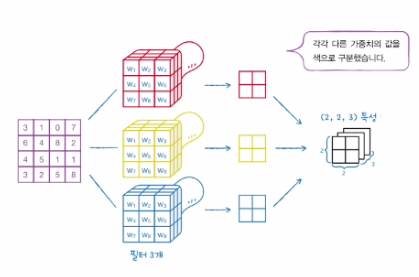
 


# 케라스 합성곱
 - 클래스 : Conv2D(필터의 개수, 커널의 사이즈, 활성함수 지정)
 - 커널의 크기는 보통 (3,3) or (5,5)를 사용함

In [2]:
from tensorflow import keras
# 합성곱 클래스 Conv2D
keras.layers.Conv2D(10, kernel_size=(3,3),activation='relu')

# 패딩과 스트라이드
 - Basic : 앞서 만들었던 특성맵 이미지의 크기를 줄이거나 키우고 싶을 때?

## 1. 크기를 동일하게 할때
 - 특성맵의 크기를 입력과 동일하게 하고싶을 땐 입력을 마치 ***더 큰 이미지***를 사용하는 것 처럼 활용해야 한다.
  > 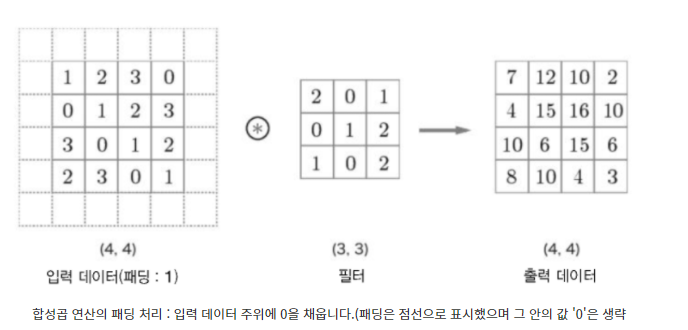<br>
  1. 위의 그림과 같이 입력값 주위에 가상의 원소를 채우는 것을 ***패딩*** 이라 한다.
  2. 패딩은 실제 입력값이 아니기에 0 으로 채운다.
  3. 0으로 값이 채워졌기에 계산에 영향을 미치지 않고 특성맵의 크기를 늘려주는 역할만 한다. 
 - 패딩을 사용하는 이유는 입력 데이터의 합성곱 참여도를 높여 전체적으로 균등하게 학습을 시키기 위함.
  > 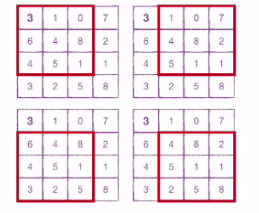<br>
  1. 위의 그림의 경우 중앙쪽의 원소들은 여러번의 합성곱 참여를 하는 반면,<br>
  상단의 3의 경우 한번밖에 참여를 하지 못함
 - 따라서 적절한 패딩의 경우 이미지 주변에 있는 정보를 잃어버리지 않도록 도와줌
 - `keras.layers.Conv2D(10, kernel_size=(3,3),activation='relu', padding='same')`에서 padding='same'을 통해 세임패딩을 사용한다.

## 2. 크기를 줄일 때  
 - 크기를 기본 에서 줄일 때에는 커널이 이동하는 칸을 기본(1칸씩 이동)에서 더 늘린 개수로 이동한다. 
 - 이동의 횟수가 키워질 경우 만들어지는 커널이 학습하는 입력의 값도 적어지기에,
  특성맵의 크기도 줄어든다.
 - 이러한 이동의 크기는 ***스트라이드*** 라고 하며, 기본은 1(한칸씩 이동) 이다.
 - `keras.layers.Conv2D(10, kernel_size=(3,3),activation='relu', padding='same',strides=1)`에서 strides= 의 크기 지정을 통해 변경함
  > 일반적으로 스트라이드를 줄이는 경우는 없기에, strides=1을 그대로 사용한다. 

# 풀링
 - 합성곱 층에서 만든 특성맵의 가로세로 크기를 줄이는 역할을 수행함
 - 차원의 개수는 건들지 않고, 특성맵의 ***사이즈***만 줄어든다.
 - 풀링에서는 곱하는 가중치가 없고, 입력에 대한 최대값, 평균값만을 찾아 산출한다.
 >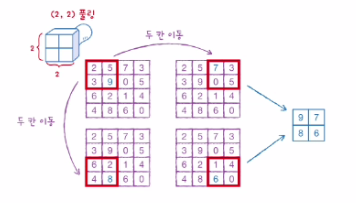
  1. 최대값 풀링 의 경우 위 그림처럼 풀링 층이 커버하는 구역에서 최대의 값을 찾아낸다.
  2. 풀링과 커널의 차이점은 입력값에 대해 겹치지 않고 이동하여 값을 산출한다. 
 - 케라스에서는 `keras.layers.MaxPooling2D(2)` 와 같이 사용한다. (기본)
 - `keras.layers.MaxPooling2D(2, stride=2, padding='valid)` 매개변수 설명
  >`keras.layers.MaxPooling2D(풀링의 크기, 풀링의 크기와 같음, 패딩을 하지 않음)`
 - 평균값 패딩의 경우`keras.layers.AveragePooling2D(2, stride=2, padding='valid)`
 - 풀링을 사용하는 이유는 스트라이드를 크게하여 특성맵을 줄이는 것 보다, 풀링층을 활용하여 크기를 줄일 때 <br>경험적으로 더 나은 성능을 내기 때문이다.

# 컬러 이미지(3개 이상의 차원)의 합성곱
 - 컬러이미지의 경우 앞서 말한것과 같이 BGR 채널 3개로 구성되어 있기에 입체적인 형태이다.
 - 따라서 이를 커버하는 커널의 경우에도 입체적인 모양으로 구성이 된다.<BR>
  > 실제로 입체적이라는것이 아닌 이해를 위한 것.<BR>
  그림으로 확인하면 아래와 같다.<BR>
  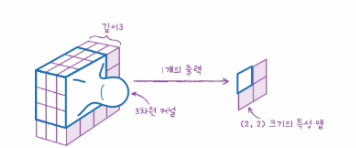

 - 출력의 경우 입력이나 필터의 차원, 커널의 깊이에 상관없이 ***출력은 항상 하나의 값*** 이다.
